# 1. NLP 이론문제

## 문제 1
일반 attention에 반해 self attention가 지닌 특징을 서술하시오.

답 : '
- Attention'은 디코더가 다음 단어를 예측할 때, 인코더 출력 중 어떤 단어에 집중할지를 계산해서 그 정보를 요약한 벡터를 만드는 기법
- 일반적인 attention에서 query는 디코더에서 key와 value는 인코더에서 오지만, self-attention에서는 query, key, value를 모두 동일한 입력(자기 자신)에서 가져옴
- self-attention을 사용하면 인코더나 디코더 내부에서 단어들 간 상호작용을 고려해, 각 단어가 문맥 속 다른 단어와 어떤 관계에 있는지 학습 가능 (내부에서 자기들끼리 attention을 주고 받는 구조)

## 문제 2
BERT에 대한 설명이 아닌 것은?

a) 사전 학습 모델

b) 양방향 문맥 이해

c) 트랜스포머의 디코더를 쌓아 올린 구조

d) 이후 RoBERTa와 ALBERT로 발전

답 : c - 트랜스포머의 '인코더'를 쌓아 올린 구조

## 문제 3
BERT와 GPT의 학습 방식 차이를 간단히 설명하세요.

답 :
- BERT는 MLM 방식으로 학습해, 문장내 일부 단어를 가리고 맞추는 방식으로 문맥을 양방향으로 이해함
  - 트랜스포머의 '인코더' 구조를 활용한 '이해 특화 모델'로, 문장의 의미 파악과 문맥 이해에 강점을 가짐
- GPT는 AR 방식으로 학습해, 앞 단어들을 기반으로 다음 단어를 순차적으로 예측하면서 학습함
  - 트랜스포머의 '디코더' 구조를 활용한 '생성 특화 모델'로, 다음 단어를 예측하며 텍스트를 생성하는 데 최적화된 모델


## 문제 4
LLM이 지닌 한계와 Rag의 필요성에 대해 간단히 서술하세요.

답 :
- LLM은 '환각' 문제와 같은 생성된 대답의 정보 정확도 문제, 정보 업데이트에 드는 매우 큰 비용 문제 등의 한계를 가지고 있음
- RAG는 LLM 모델에 외부 지식 베이스를 연결해서 '대답의 정보 정확도'와 '맥락 이해'의 한계를 개선할 수 있음

# 1. BERT 실습

**BERT (Bidirectional Encoder Representations from Transformers)**
- 문장 분류(스팸 메일 탐지), 질의응답 시스템(챗봇, 검색 엔진), 번역(다국어 지원), 텍스트 요약(뉴스 요약) 등 다양한 NLP 작업에 사용
- 문맥을 양방향으로 이해하여 텍스트의 의미를 정밀하게 파악하며, 사전 학습된 모델을 기반으로 빠르게 응용 가능

### 1. 모델과 tokenizer 초기화
- tokenizer를 통해 문장을 토큰으로 나누고, 이를 정수 인덱스로 변환하여 모델이 이해할 수 있도록 함

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

# BERT 모델과 tokenizer 초기화
tokenizer = BertTokenizer.from_pretrained('klue/bert-base') # base : 모델크기, (uncased : 소문자 학습)
model = BertForMaskedLM.from_pretrained('klue/bert-base') # base : 모델크기, (uncased : 소문자 학습)
# tokenizer : raw text를 개별 토큰으로 분리(Wordpiece). 토크나이저 사전에 따라 고유한 정수 인덱스(고정값)를 매핑함.

# tokenizer를 통해 생성된 정수 인덱스 : 텍스트를 모델이 읽을 수 있도록 숫자화
# Embedding vector : 단어의 의미적, 문맥적 특성을 모델링

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### 2. 입력 텍스트 준비 및 토큰화
- [MASK] 토큰을 삽입한 문장을 설정하고, tokenizer.tokenize()로 텍스트 토큰화
- [MASK]를 활용하여 문맥 속에서 특정 단어를 추론하는 상황을 만들고, 이를 모델이 학습한 패턴과 비교하도록 함


In [ ]:
# 테스트할 문장
text = "[CLS] 열여덟, 우리는 서로의 이름을 처음 불렀다. 그리고 스물 하나, 우린 [MASK]을 했다.[SEP]"

# 문장을 토큰으로 변환
tokenized_text = tokenizer.tokenize(text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

print(tokenized_text)
print(indexed_tokens)


['[CLS]', '열', '##여', '##덟', ',', '우리', '##는', '서로', '##의', '이름', '##을', '처음', '불렀', '##다', '.', '그리고', '스물', '하나', ',', '우린', '[MASK]', '을', '했', '##다', '.', '[SEP]']
[2, 1432, 2173, 3542, 16, 3616, 2259, 4084, 2079, 3934, 2069, 3790, 6895, 2062, 18, 3673, 10514, 3657, 16, 8983, 4, 1498, 1902, 2062, 18, 3]


### 3. MASK된 위치 확인
- [MASK] 토큰의 위치를 탐지해 해당 위치에서 모델이 단어를 예측하도록 지정합니다.


In [ ]:
# 마스킹된 위치 찾기
masked_index = tokenized_text.index("[MASK]") ; print(masked_index)

20


### 4. 정수화된 토큰 인덱스를 tensor로 변환 후 모델 예측 실행
- 모델은 텐서 데이터 구조를 필요로 하므로, 입력값을 변환하여 적합한 형식으로 만듦.
- 역전파를 비활성화하고, 모델이 각 토큰에 대해 가능한 모든 단어 점수 출력

In [ ]:
# 토큰화된 텍스트 -> 정수인덱스(ID) -> Pytorch 텐서
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
tokens_tensor = torch.tensor([indexed_tokens])

# 모델에 토큰 텐서를 전달하고 예측 실행
with torch.no_grad(): # 가중치 업데이트 없으므로 자동미분연산은 끔
    outputs = model(tokens_tensor) # 예측. 모델은 각 토큰위치에 대한 예측 결과를 반환.
    predictions = outputs[0] # logits (각 토큰위치에서 가능한 모든 토큰들의 원시점수)
print(predictions)

tensor([[[ -6.0337,   4.5526,  -5.6312,  ...,  -7.3959,  -7.4220,  -5.8337],
         [ -6.1762,   4.7585,  -7.3973,  ...,  -7.6209, -12.2124,  -6.0998],
         [ -7.4194,   3.9148,  -6.1517,  ...,  -6.8162,  -9.5421,  -3.0473],
         ...,
         [ -7.3761,   8.6972,  -5.4904,  ...,  -8.7202,  -9.1403,  -5.8566],
         [ -5.6347,  10.3884,  -4.3374,  ...,  -8.6900,  -7.4171,  -3.5043],
         [ -5.6652,  10.3407,  -4.4099,  ...,  -8.7521,  -7.4286,  -3.6681]]])


### 5. MASK된 토큰 예측
- [MASK] 위치에서 가장 높은 점수를 받은 토큰의 인덱스를 추출하고, 이를 단어로 변환

In [ ]:
# 예측된 토큰 확인
predicted_index = torch.argmax(predictions[0, masked_index]).item() # masked_index에 들어갈 것으로 가장 확률이 높은 인덱스
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]

# 예측된 토큰으로 마스크 채우기
tokenized_text[masked_index] = predicted_token
# 토큰화된 텍스트를 다시 문자열로 변환
filled_text = tokenizer.convert_tokens_to_string(tokenized_text[1:-1])

print("Original:", text)
print("Masked:", tokenized_text)
print("Predicted token:", predicted_token) ; print()

print("Filled sentence:", filled_text)

Original: [CLS] 열여덟, 우리는 서로의 이름을 처음 불렀다. 그리고 스물 하나, 우린 [MASK]을 했다.[SEP]
Masked: ['[CLS]', '열', '##여', '##덟', ',', '우리', '##는', '서로', '##의', '이름', '##을', '처음', '불렀', '##다', '.', '그리고', '스물', '하나', ',', '우린', '사랑', '을', '했', '##다', '.', '[SEP]']
Predicted token: 사랑

Filled sentence: 열여덟 , 우리는 서로의 이름을 처음 불렀다 . 그리고 스물 하나 , 우린 사랑 을 했다 .



### 6. MASK된 문장 복원
- 예측된 토큰으로 [MASK]를 대체하여 완성된 문장 생성

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

# BERT 모델과 토크나이저 초기화
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
model = BertForMaskedLM.from_pretrained('klue/bert-base')

def fill_mask(input_text):
    # 텍스트를 토큰으로 변환
    tokenized_text = tokenizer.tokenize(input_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

    # 마스킹된 위치 찾기
    masked_index = tokenized_text.index("[MASK]")

    # 토큰화된 텍스트 -> 정수인덱스(ID) -> Pytorch 텐서
    tokens_tensor = torch.tensor([indexed_tokens])

    # 모델에 토큰 텐서를 전달하고 예측 수행
    with torch.no_grad():
        outputs = model(tokens_tensor)
        predictions = outputs[0]

    # 예측된 토큰 확인
    predicted_index = torch.argmax(predictions[0, masked_index]).item()
    predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]

    # 마스크를 채운 문장 반환
    tokenized_text[masked_index] = predicted_token
    return tokenizer.convert_tokens_to_string(tokenized_text[1:-1])

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


예시 문장 만들어서 MLM을 사용해 보세요!

In [ ]:
# 예시 1: "[CLS] 열여덟, 우리는 서로의 이름을 처음 불렀다. 그리고 스물 하나, 우린 [MASK]을 했다.[SEP]"
# 예시 2: "[CLS] 연동운은 INSGIHT 학회를 정말 사랑한다. 그는 INSIGHT 학회를 위해 [MASK]를 했다.[SEP]"
# 이 예시를 참고해서 [CLS](맨 앞), [MASK](채울 부분), [SEP](맨 뒤)를 추가해서 여러분만의 예시 문장 만들어주세요
input_text = "[CLS] 나 우울해서 빵 샀어. 내가 너에게 원하는 건 [MASK]이야. [SEP]" # 자유롭게 예시 문장 만들어보세요!
filled_text = fill_mask(input_text)
print("Filled sentence:", filled_text)

Filled sentence: 나 우울해서 빵 샀어 . 내가 너에게 원하는 건 사랑 이야 .


오, 이 모델은 F인 것 같습니다.

### 7. 한국어 금융 뉴스 긍정, 부정 분류

In [ ]:
!pip install transformers
!pip install datasets

finance_data.csv를 다운로드 합니다

In [ ]:
!wget https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv

--2025-05-26 16:11:55--  https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1319001 (1.3M) [text/plain]
Saving to: ‘finance_data.csv’

finance_data.csv    100%[===================>]   1.26M  --.-KB/s    in 0.04s   

2025-05-26 16:11:55 (31.9 MB/s) - ‘finance_data.csv’ saved [1319001/1319001]



In [ ]:
import pandas as pd
df = pd.read_csv('finance_data.csv')

In [ ]:
df.head()

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."


In [ ]:
print('샘플의 개수 :', len(df))

샘플의 개수 : 4846


neutral, positive. negative를 숫자로 바꿔줍니다. <br>
neutral:0, positive:1, negative:2로 바꿀게요

In [ ]:
df['labels'] = df['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])
df.head()

<ipython-input-39-910beaa298a3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['labels'] = df['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])


,labels,sentence,kor_sentence
0,0,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,0,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,2,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,1,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,1,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."


위의 dataframe을 dataset 객체로 변환해줍니다

In [ ]:
from datasets import Dataset

all_data = Dataset.from_pandas(df)

In [ ]:
all_data

Dataset({
    features: ['labels', 'sentence', 'kor_sentence'],
    num_rows: 4846
})

all_data를 train과 test로 나눠줍니다<br>
train : test = 4 : 1로 나눠줍니다

In [ ]:
cs = all_data.train_test_split(test_size=0.2)

train_cs = cs['train']
test_cs = cs['test']

In [ ]:
train_cs

Dataset({
    features: ['labels', 'sentence', 'kor_sentence'],
    num_rows: 3876
})

In [ ]:
test_cs

Dataset({
    features: ['labels', 'sentence', 'kor_sentence'],
    num_rows: 970
})

In [ ]:
print("-----train_cs-----")
print(train_cs)
print("-----test_cs-----")
print(test_cs)

-----train_cs-----
Dataset({
    features: ['labels', 'sentence', 'kor_sentence'],
    num_rows: 3876
})
-----test_cs-----
Dataset({
    features: ['labels', 'sentence', 'kor_sentence'],
    num_rows: 970
})


특정 샘플과, 샘플에 해당하는 레이블을 출력합니다.<br>
레이블은 0: neutral, 1: positive, 2: negative였죠

In [ ]:
print('샘플:', train_cs['kor_sentence'][0])
print('샘플의 레이블:', train_cs['labels'][0])

샘플: 그리고 미국의 에너지 임원들은 높은 철강 가격이 에너지 탐사를 위협하고 있다고 말했습니다.
샘플의 레이블: 2


In [ ]:
import pandas as pd
import numpy as np
import random
import time
import datetime
from tqdm import tqdm

import csv
import os

import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, hamming_loss

훈련 데이터, 검증 데이터, 테스트 데이터에 대해서 `[CLS] 문장 [SEP]` 구조를 만듭니다.


In [ ]:
train_sentences = list(map(lambda x: '[CLS] ' + str(x) + ' [SEP]', train_cs['kor_sentence']))
test_sentences = list(map(lambda x: '[CLS] ' + str(x) + ' [SEP]', test_cs['kor_sentence']))

train, validation, test에 대해 labels 정보만 따로 저장합니다

In [ ]:
train_labels = train_cs['labels']
test_labels = test_cs['labels']

test_sentences와 test_labels를 확인합니다

In [ ]:
test_sentences[:5]

['[CLS] 오리온제약은 영업이익이 2004년보다 42.5% 늘었다. [SEP]',
 '[CLS] 선별된 성장 부문에 집중하고 기업구조를 합리화하겠다는 계획과 맥이 닿아 있다. [SEP]',
 '[CLS] 합작법인은 곧바로 생산기술에 약 50만유로를 투자한다. [SEP]',
 '[CLS] 아시아 태평양 지역의 엔진 산업 프로필은 엔진 산업을 포괄하는 최상위 데이터 및 분석에 필수적인 리소스입니다. [SEP]',
 '[CLS] Oriola-KD는 2008년 송장이 2007년 송장과 비교할 수 있는 수준보다 높을 것으로 예상하고 있다. [SEP]']

In [ ]:
test_labels[:5]

[1, 1, 0, 0, 1]

tokenizer와 model을 불러옵니다.<br>
tokenizer로는 BertTokenizer를 사용하고, model은 분류모델인 BertForSequenceClassification을 사용합니다<br>
우리는 neutral, negative, positive중에 하나를 예측해야 하므로, num_labels에 3을 넣어서 model에 num_labels를 넘겨줍니다

In [ ]:
# 한국어 BERT 중 하나인 'klue/bert-base'를 사용.
tokenizer = BertTokenizer.from_pretrained('klue/bert-base') # 사전학습 된 상태로 불러옵니다

num_labels = 3

model = BertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=num_labels) # 사전학습 된 상태로 불러옵니다

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 원래 BERT는 max_length가 512지만, 128로 축소해서 학습하면 더 빠른 시간에 학습이 가능합니다.
# MAX_LEN을 128로 하고, 성능이 좋지 않으면 MAX_LEN을 256 -> 384 -> 512로 늘려가며 비교하는 것도 방법입니다
MAX_LEN = 128

# 실습때 했던 encode_korquad_examples() 함수 기억하시나요? 그 함수와 유사하게 작성되었습니다.
def encode_classification_data(sentences, labels):
    encodings = tokenizer(
        sentences,
        padding='max_length',
        truncation=True,
        max_length=MAX_LEN,
        return_tensors='pt'
    )

    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    labels = torch.tensor(labels)

    dataset = TensorDataset(input_ids, attention_mask, labels)
    return dataset


train, validation, test 데이터셋을 생성합니다

In [ ]:
train_dataset = encode_classification_data(train_sentences, train_labels)
test_dataset = encode_classification_data(test_sentences, test_labels)

In [ ]:
print('훈련 데이터의 크기:', len(train_dataset))
print('테스트 데이터의 크기:', len(test_dataset))

훈련 데이터의 크기: 3876
테스트 데이터의 크기: 970


DataLoader를 생성합니다

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

test_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),  # 테스트도 일반적으로 Sequential을 씀
    batch_size=batch_size
)


In [ ]:
# 옵티마이저 지정
# AdamW 사용합니다
# AdamW에 모델의 파라미터 정보를 넘겨줍니다.
optimizer = AdamW(model.parameters(),lr = 2e-5,eps = 1e-8)

모델을 학습합니다

In [ ]:
epochs = 2
device = torch.device("cuda" if torch.cuda.is_available else "cpu") # gpu 사용 가능하면 gpu(cuda)로, 그렇지 않으면 cpu로
model.to(device)

for epoch_i in range(epochs):
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    total_loss = 0

    model.train() # 모델을 학습 모드로 설정합니다

    loop = tqdm(train_dataloader, desc=f'Epoch {epoch_i + 1}', leave=False)

    for step, batch in enumerate(loop):
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]

        optimizer.zero_grad() # 가중치 0으로 초기화

        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward() # 역전파
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step() # 파라미터 업데이트

        loop.set_postfix(loss=loss.item())

    avg_train_loss = total_loss / len(train_dataloader)

    print(f"\n  Average training loss: {avg_train_loss:.4f}")


======== Epoch 1 / 2 ========



  Average training loss: 0.4974

======== Epoch 2 / 2 ========



  Average training loss: 0.2666


학습된 모델의 가중치를 저장합니다

In [ ]:
torch.save(model.state_dict(), "BERT_news.pt")

모델의 가중치를 다시 불러옵니다<br>
- 지금처럼 학습과 테스트를 한 번에 이어서 할 때는 모델 가중치를 다시 불러올 필요가 없습니다.
- 그러나 내가 이전에 학습한 모델을 사용해서 예측을 수행하고 싶을 때는 다음과 같이 이전에 학습된 가중치를 불러와야 합니다

In [ ]:
num_labels = 3

model = BertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=num_labels)
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
model.load_state_dict(torch.load("BERT_news.pt"))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

평가하기 위한 함수를 정의합니다

In [ ]:
def compute_metrics(preds, labels):
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1_macro': f1_score(labels, preds, average='macro', zero_division=0),
        'f1_micro': f1_score(labels, preds, average='micro', zero_division=0),
        'f1_weighted': f1_score(labels, preds, average='weighted', zero_division=0)
    }

테스트 데이터에 대해 평가를 수행합니다

In [ ]:
from tqdm import tqdm

model.eval()
model.to(device)
accum_logits, accum_label_ids = [], []

for batch in tqdm(test_dataloader, desc="Testing"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            token_type_ids=None
        )

    logits = outputs.logits if hasattr(outputs, 'logits') else outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # 예측 결과 저장
    accum_logits.extend(np.argmax(logits, axis=1))
    accum_label_ids.extend(label_ids)

# NumPy 배열로 변환
accum_logits = np.array(accum_logits)
accum_label_ids = np.array(accum_label_ids)

# 메트릭 계산
results = compute_metrics(accum_logits, accum_label_ids)

# 출력
print("\n[✔️ Test Evaluation Result]")
print("Accuracy: {0:.4f}".format(results['accuracy']))
print("F1 (Macro) Score: {0:.4f}".format(results['f1_macro']))
print("F1 (Micro) Score: {0:.4f}".format(results['f1_micro']))
print("F1 (Weighted) Score: {0:.4f}".format(results['f1_weighted']))

Testing: 100%|██████████| 61/61 [00:06<00:00,  9.72it/s]


[✔️ Test Evaluation Result]
Accuracy: 0.8289
F1 (Macro) Score: 0.8080
F1 (Micro) Score: 0.8289
F1 (Weighted) Score: 0.8299


HuggingFace transformers 라이브러리의 pipeline API를 활용하면 텍스트 분류 모델을 추론하기 위한 설정을 편리하게 할 수 있습니다

In [ ]:
from transformers import pipeline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipeline("text-classification", # 수행할 작업: 텍스트 분류
                model=model.to(device), # 사용할 모델
                tokenizer=tokenizer, # 모델에 맞는 토크나이저
                max_length=512, # 입력 문장 최대 길이
                return_all_scores=True, # 모든 클래스의 확률 반환
                function_to_apply='softmax' # softmax 사용
)

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
result = pipe('SK하이닉스가 매출이 급성장하였다') # 이 문장에 대해 label 점수를 보면
print(result)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[[{'label': 'LABEL_0', 'score': 0.01670713722705841}, {'label': 'LABEL_1', 'score': 0.9793924689292908}, {'label': 'LABEL_2', 'score': 0.003900300245732069}]]


return_all_scores = True로 했기 때문에 LABEL_0, LABEL_1, LABEL_2의 모든 score가 다 출력됩니다

LABEL_0, LABEL_1, LABEL_2 대신에 중립, 긍정, 부정으로 출력하도록 label_dict를 설정합니다

In [ ]:
label_dict = {'LABEL_0' : '중립', 'LABEL_1' : '긍정', 'LABEL_2' : '부정'}

label_dict에서 LABEL_0, LABEL_1, LABEL_2를 중립, 긍정, 부정으로 바꿔서 출력하는 함수를 정의합니다

In [ ]:
def prediction(text):
  result = pipe(text)

  return [label_dict[result[0]['label']]]

In [ ]:
# 이전의 pileline 코드에서 return_all_scores를 제거합니다. return_all_scores는 default가 False입니다
pipe = pipeline("text-classification", model=model.to(device), tokenizer=tokenizer, max_length=512,function_to_apply='softmax')

Device set to use cuda:0


In [ ]:
result = pipe('SK하이닉스가 매출이 급성장하였다')
print(result)

[{'label': 'LABEL_1', 'score': 0.9793924689292908}]


return_all_scores를 False로 했으므로 가장 높은 score의 LABEL만 출력됩니다

prediction 함수를 사용하여 다양한 금융 텍스트의 긍정/부정/중립을 분석해보면

In [ ]:
prediction('SK하이닉스가 매출이 급성장하였다')

['긍정']

In [ ]:
prediction('ChatGPT의 등장으로 인공지능 스타트업들은 비상이다')

['부정']

In [ ]:
prediction('인공지능 기술의 발전으로 누군가는 기회를 얻을 것이고, 누군가는 얻지 못할 것이다')

['긍정']

원래 결과는 ['중립']이었던 것 같은데, 결과가 ['긍정']으로 바뀌었다..!
- 모델 학습 과정에서 차이가 생겼나 ?

In [ ]:
prediction('삼성전자의 주가가 상승곡선을 그리고 있다')

['긍정']

# 2. Text Generation : GPT

In [ ]:
import torch
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast

# 모델과 토크나이저 로드
model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
tokenizer = PreTrainedTokenizerFast.from_pretrained('skt/kogpt2-base-v2')

# 시작 텍스트 설정
# 예시 text = '인사이트 13기 회장, 부회장은 과연 누가 될까? 너무 기대된다'
# 예시 텍스트 말고 다른 text 직접 입력해보세요! 기발한 아이디어 기다립니다ㅎㅎ
text = 'INSIGHT 학회 2025년 상반기 2차 인사이콘 1등 팀은 과연 누구일까요?'
input_ids = tokenizer.encode(text, return_tensors='pt')

# 텍스트 생성
gen_ids = model.generate(input_ids,
                         max_length=128,
                         repetition_penalty=2.0,
                         pad_token_id=tokenizer.pad_token_id,
                         early_stopping=True,
                         eos_token_id=tokenizer.eos_token_id,
                         bos_token_id=tokenizer.bos_token_id,
                         use_cache=True)
generated = tokenizer.decode(gen_ids[0])

print(generated)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


INSIGHT 학회 2025년 상반기 2차 인사이콘 1등 팀은 과연 누구일까요?"라며 "올해 초, SK텔레콤이 주최한 '2020년 하반기부터 AR/VoIP 서비스에 대한 세미나'에서 발표를 한 바 있다. 이번 세미나는 KISA가 주관하는 국내 최대 규모의 VON(Virtual Over The Network) 컨퍼런스로, 올해는 코로나19로 인해 온라인 화상회의 및 오프라인 회의 모두 온라인으로 진행됐다. 특히 지난 6월부터 시작된 언택트 시대에 맞춰 비대면 방식으로 진행된 만큼, 많은


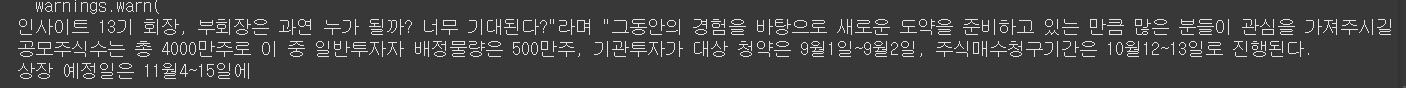

ㅋㅋㅋㅋ 회장, 부회장의 단어를 보고 인사이트를 기업으로 인식한 거 같아요

과제 끝!!

# 3. Langchain ~ Rag (참고)

### Langchain
- LLM을 사용한 어플리케이션 개발 단순화를 위한 프레임워크
- python과 JavaScript 라이브러리 제공
- 요약, 번역, 챗봇, QnA, 데이터 증강(Augmentation) 등의 서비스 구현 가능

### RAG
- LLM 모델의 단점 중 사실 관계 오류 가능성과 맥락 이해의 한계를 개선하는데 초점을 맞춘 방법
- 외부 지식 베이스를 연결해 모델의 생성 능력과 사실 관계 파악 능력 향상
- 할루시네이션 감소와 최신 정보 반영에 유리

아래 코드 실행하려면 OPEN AI의 langchain API Key가 필요한데, 현재는 유료라서... 그냥 실행하지 말고 보기만 해주세요

In [ ]:
!pip install unstructured
!pip install sentence-transformers
!pip install chromadb
!pip install openai
!pip install langchain

## 1. 데이터 가져오기
- 분석할 문서를 불러와 데이터 파이프라인의 입력으로 사용
- 자연어 처리를 수행하기 위해 원천 데이터를 준비하는 단계


In [ ]:
from langchain.document_loaders import TextLoader
documents = TextLoader("AI.txt").load()

## 2. 텍스트 분할
- 긴 문서를 일정 크기의 청크로 나눠 처리 가능하도록 만듦
- 검색 효율성과 모델의 입력 제약을 고려한 전처리 작업


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# 문서를 청크로 분할
def split_docs(documents,chunk_size=1000,chunk_overlap=20):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
  docs = text_splitter.split_documents(documents)
  return docs

# docs 변수에 분할 문서를 저장
docs = split_docs(documents)

## 3. 임베딩 변환
- 텍스트 데이터를 벡터 공간으로 매핑하여 기계 학습 모델이 이해할 수 있는 수치 데이터로 변환
- 텍스트의 의미적 유사성을 계산하고 처리를 자동화하기 위한 단계


In [ ]:
from langchain.embeddings import SentenceTransformerEmbeddings
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

## 4. 벡터 저장
- 변환된 벡터 데이터를 데이터베이스에 저장하여 고속 검색과 활용 지원
- 효율적인 질의 응답 및 문서 검색 시스템 구현을 위한 핵심 단계

In [ ]:
# Chromdb에 벡터 저장
from langchain.vectorstores import Chroma
db = Chroma.from_documents(docs, embeddings)

## 5. 질문 응답
- 입력된 질문과 관련된 문서를 검색한 뒤 GPT 모델로 답변 생성
- 사용자 질문에 적합한 답변을 제공하기 위해 유사 문서 검색과 자연어 처리를 결합한 핵심 과정

In [ ]:
import os #운영체제(os) 모듈을 가져올 때 사용되는 라이브러리
os.environ["OPENAI_API_KEY"] = "sk-" #openai 키 입력 -> 현재 유료로 사용 가능,,,ㅠㅠ

from langchain.chat_models import ChatOpenAI
model_name = "gpt-3.5-turbo"  #GPT-3.5 turbo 모델 사용
llm = ChatOpenAI(model_name=model_name)

# Q&A 체인을 사용하여 쿼리에 대한 답변 얻기
from langchain.chains.question_answering import load_qa_chain
chain = load_qa_chain(llm, chain_type="stuff",verbose=True)

# 쿼리를 작성하고 유사성 검색을 수행하여 답변을 생성,따라서 txt에 있는 내용을 질의해야 합니다
query = "AI란?"
matching_docs = db.similarity_search(query)
answer =  chain.run(input_documents=matching_docs, question=query)
answer